In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

from simulator_myokit import Simulator
sys.path.append('../')
import plot_cell


C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


Times has been set.


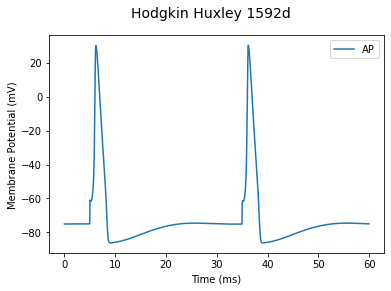

--- 8.356039762496948 seconds ---


In [2]:
'''
Hodgkin Huxley 1592d
'''
model_path = "./mmt-model-files/hh-1952d-modern.mmt"  
start_time = time.time()
model = Simulator(model_path) 
model.name = "Hodgkin Huxley 1592d"
times = np.linspace(0,60,1000)
model.set_times(times)
d = model.simulate(pre_sim=0)    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


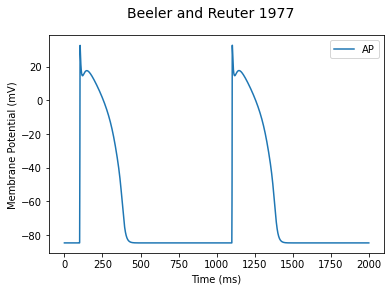

--- 6.896872282028198 seconds ---


In [3]:
'''
Beeler and Reuter 1977
'''
model_path = "./mmt-model-files/br-1977.mmt" 
start_time = time.time()
model = Simulator(model_path) 
model.name = "Beeler and Reuter 1977"
times = np.linspace(0,2000,5000)
model.set_times(times)
d = model.simulate()    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

In [7]:
'''
Kernik 2019
'''
model_path = "./mmt-model-files/kernik-2019.mmt" 
start_time = time.time()
model = Simulator(model_path) 
model.name = "Kernik 2019"
times = np.linspace(0,2000,10000)
model.set_times(times)
d = model.simulate()    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 636: illegal multibyte sequence

Times has been set.


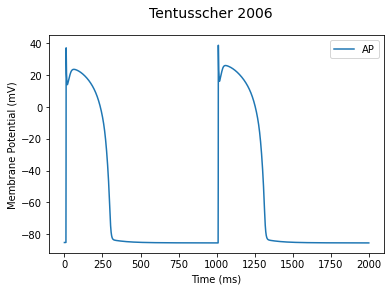

--- 7.44154167175293 seconds ---


In [5]:
'''
Tentusscher 2006
'''
model_path = "./mmt-model-files/tentusscher-2006.mmt" 

start_time = time.time()
model = Simulator(model_path) 
model.name = "Tentusscher 2006"
times = np.linspace(0,2000,10000)
model.set_times(times)
d = model.simulate()    
plot_cell.plot_AP(model.name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


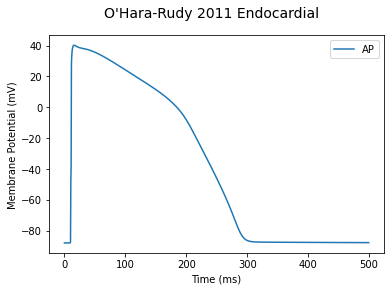

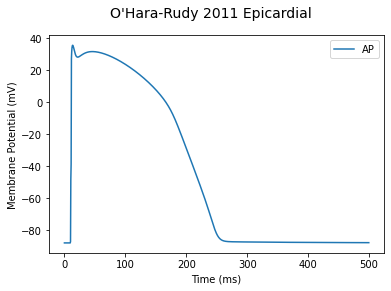

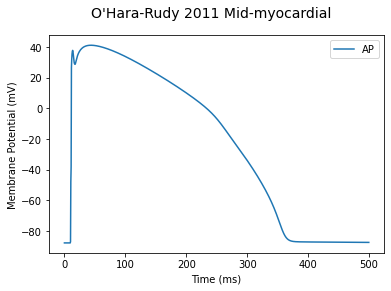

--- 11.51262640953064 seconds ---


In [6]:
'''
O'Hara-Rudy 2011
'''
model_path = "./mmt-model-files/ohara-2011.mmt" 
cells = {
    'Endocardial' : 0,
    'Epicardial' : 1,
    'Mid-myocardial' : 2,
}
start_time = time.time()
model = Simulator(model_path) 
model.name = "O'Hara-Rudy 2011"
times = np.arange(30)
times = np.linspace(0,500,1000)
model.set_times(times)
model.bcl = 1000
for name, mode in cells.items():    
    model.simulation.set_constant('cell.mode', mode)    
    d = model.simulate(pre_sim=1)    
    plot_cell.plot_AP(model.name+' '+name, d['engine.time'], d['membrane.V'])
print("--- %s seconds ---"%(time.time()-start_time))